In [2]:
import tensorflow as tf
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

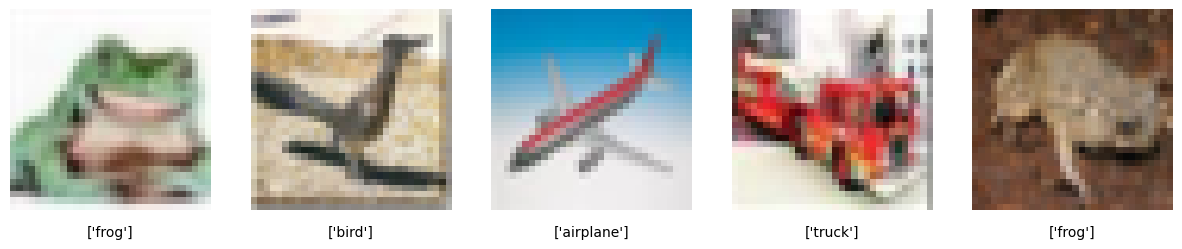

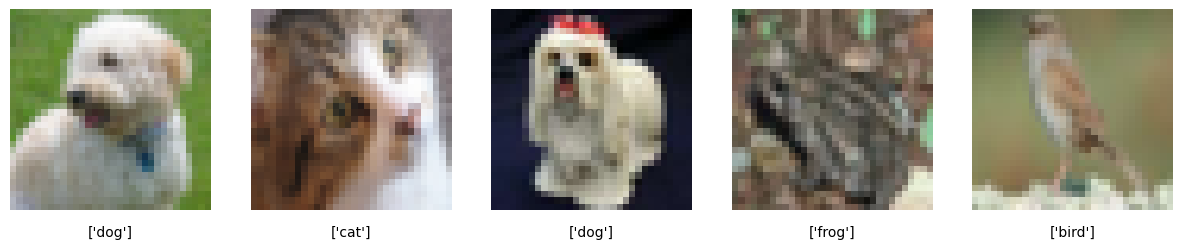

In [ ]:
# Task 1:
## Q1.1
### Load the CIFAR-10 dataset
dataset= tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = dataset.load_data()

### Sample 2500 images from the training set
sample_train_indices = np.random.choice(len(x_train), 2500, replace=False)
x_train_sample = x_train[sample_train_indices]
y_train_sample = y_train[sample_train_indices]

### Sample 500 images from the test set
sample_test_indices = np.random.choice(len(x_test), 500, replace=False)
x_test_sample = x_test[sample_test_indices]
y_test_sample = y_test[sample_test_indices]

### Function to return the class labels for each int label
def classLabels(label):
    classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    return [classes[label]]
    
## Q1.2
### Function to display images in a 1x5 grid
def display_images(images, labels, title):
    plt.figure(figsize=(15, 3))
    for i in range(5):
        ax = plt.subplot(1, 5, i + 1)
        plt.imshow(images[i])
        plt.axis("off")
        ax.set_title(classLabels(labels[i][0]), fontsize=10, pad=10, y=-0.2)
    plt.show()

### Randomly select 5 images from the training sample
train_indices = np.random.choice(len(x_train_sample), 5, replace=False)
train_images = x_train_sample[train_indices]
train_labels = y_train_sample[train_indices]

### Randomly select 5 images from the test sample
test_indices = np.random.choice(len(x_test_sample), 5, replace=False)
test_images = x_test_sample[test_indices]
test_labels = y_test_sample[test_indices]

### Display the images
display_images(train_images, train_labels, "Sample Train Images")
display_images(test_images, test_labels, "Sample Test Images")

## Q1.3
### Normalize the images
x_train_sample = (x_train_sample / 127.5) - 1
x_test_sample = (x_test_sample / 127.5) - 1


Normalizing is important because it makes the gradient based algorithms work better because it avoids large gradients that regular 0 to 255 pixel values. It allows optimization algorithms (which we will later use Adam) to work better with steps that are more consistent.

In [26]:
# Task 2:
## Q2.1 
### Define the LeNet-5 architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Conv2D(16, kernel_size=(5, 5), activation='relu'),
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

### One-hot encode the labels
y_train_sample_one_hot = tf.keras.utils.to_categorical(y_train_sample, 10)
y_test_sample_one_hot = tf.keras.utils.to_categorical(y_test_sample, 10)

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8435 - loss: 0.7872 - val_accuracy: 0.8940 - val_loss: 0.2978
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8966 - loss: 0.2919 - val_accuracy: 0.8980 - val_loss: 0.2733
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9058 - loss: 0.2768 - val_accuracy: 0.9000 - val_loss: 0.2699
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9060 - loss: 0.2462 - val_accuracy: 0.8960 - val_loss: 0.2676
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9147 - loss: 0.2459 - val_accuracy: 0.9000 - val_loss: 0.2683
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9165 - loss: 0.2442 - val_accuracy: 0.9140 - val_loss: 0.2447
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9123 - loss: 0.2411 - val_accuracy: 0.9040 - val_loss: 0.2581
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9068 - loss: 0.2409 - val_accuracy: 0.9140 - val_loss:

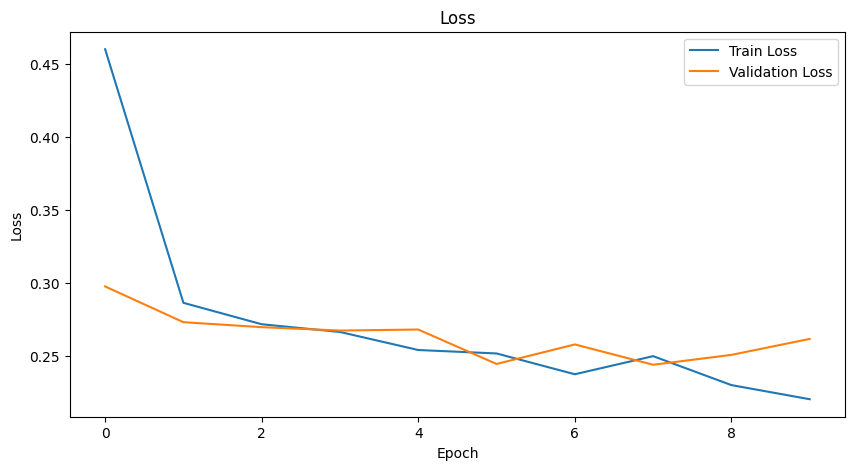

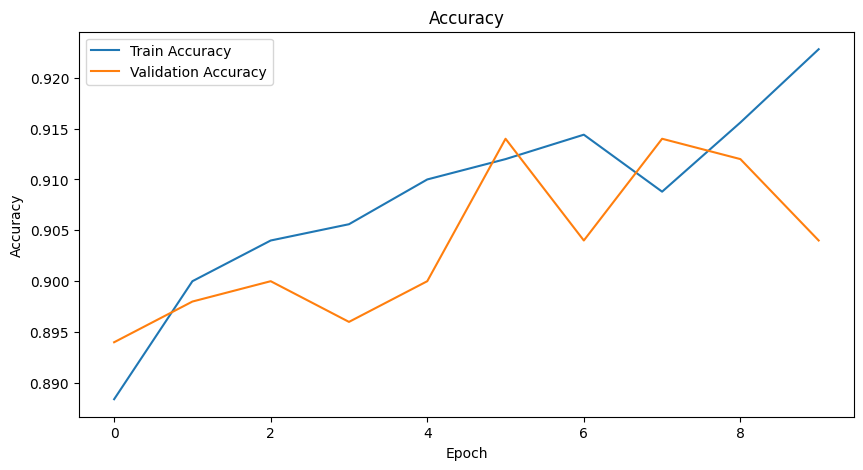

In [27]:
# Task 3:
## Q3.1
### Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
### Train the model
history = model.fit(x_train_sample, y_train_sample_one_hot, epochs=10, validation_data=(x_test_sample, y_test_sample_one_hot))

## Q3.2
### Print the train loss, train accuracy, validation loss, and validation accuracy after each epoch
for i in range(10):
    print(f"Epoch {i+1}/{10}, Train Loss: {history.history['loss'][i]}, Train Accuracy: {history.history['accuracy'][i]}, Validation Loss: {history.history['val_loss'][i]}, Validation Accuracy: {history.history['val_accuracy'][i]}")
    
## Q3.3
### Plot the train and validation loss and accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7073 - loss: 27.8459 - val_accuracy: 0.8940 - val_loss: 6.3783
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8989 - loss: 4.0879 - val_accuracy: 0.8940 - val_loss: 1.2083
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8899 - loss: 1.0544 - val_accuracy: 0.8940 - val_loss: 0.7713
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8958 - loss: 0.7347 - val_accuracy: 0.8940 - val_loss: 0.6356
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9003 - loss: 0.6175 - val_accuracy: 0.8940 - val_loss: 0.5611
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9025 - loss: 0.5382 - val_accuracy: 0.8940 - val_loss: 0.5141
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8988 - loss: 0.5018 - val_accuracy: 0.8940 - val_loss: 0.4819
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9018 - loss: 0.4719 - val_accuracy: 0.8940 - val_loss

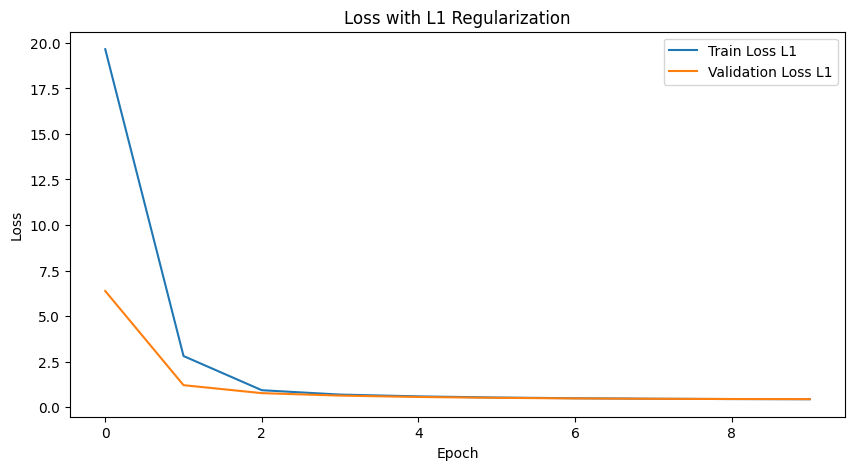

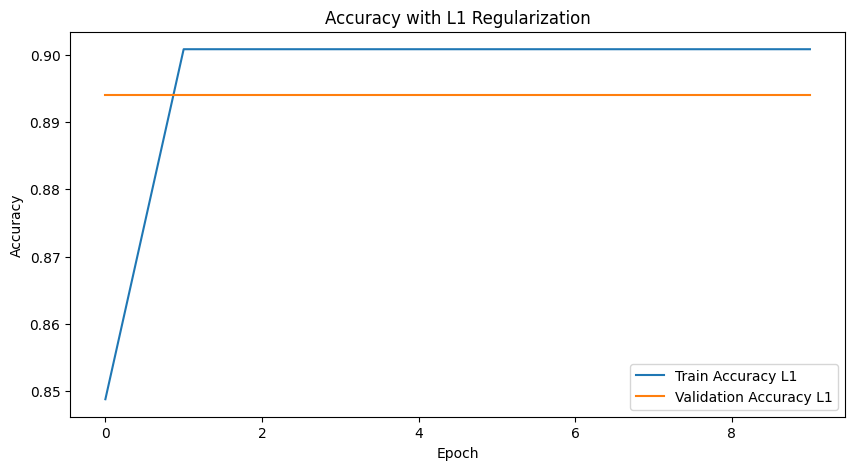

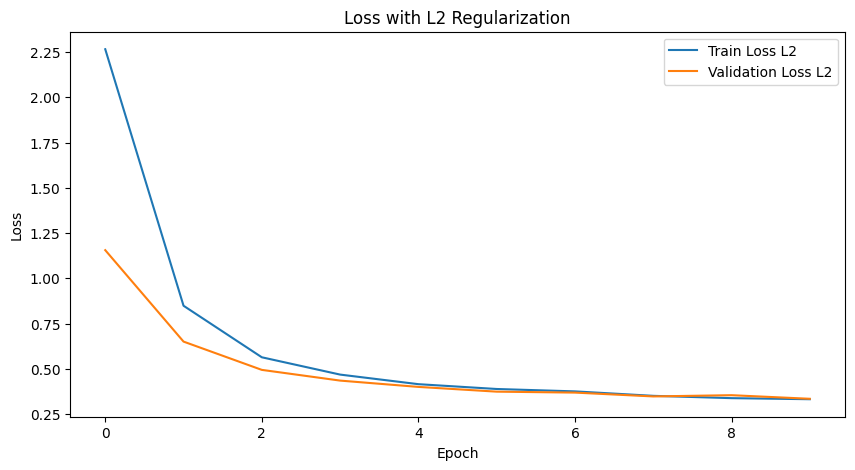

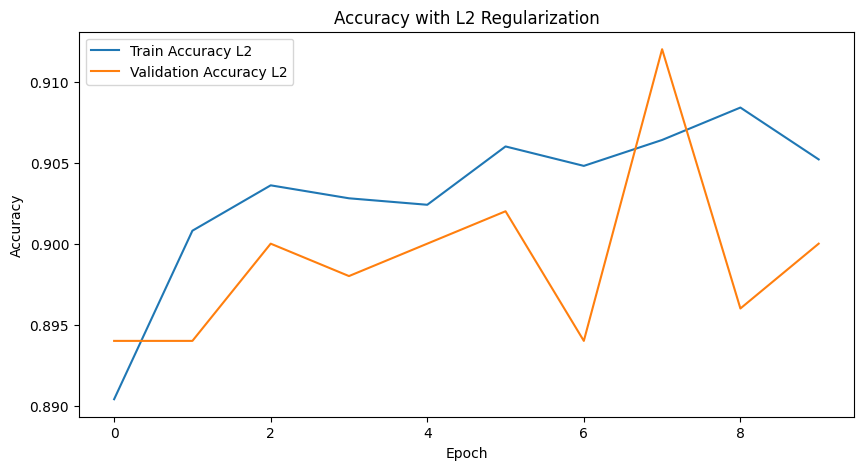

In [ ]:
from tensorflow.keras.regularizers import l1, l2

# Task 4:
## Q4.1
### Define the LeNet-5 architecture with L1 regularization
model_l1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=l1(0.01)),
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Conv2D(16, kernel_size=(5, 5), activation='relu', kernel_regularizer=l1(0.01)),
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='relu', kernel_regularizer=l1(0.01)),
    tf.keras.layers.Dense(84, activation='relu', kernel_regularizer=l1(0.01)),
    tf.keras.layers.Dense(10, activation='softmax')
])

### Define the LeNet-5 architecture with L2 regularization
model_l2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=l2(0.01)),
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Conv2D(16, kernel_size=(5, 5), activation='relu', kernel_regularizer=l2(0.01)),
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='relu', kernel_regularizer=l2(0.01)),
    tf.keras.layers.Dense(84, activation='relu', kernel_regularizer=l2(0.01)),
    tf.keras.layers.Dense(10, activation='softmax')
])

### Compile the models
model_l1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_l2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Train the models
history_l1 = model_l1.fit(x_train_sample, y_train_sample_one_hot, epochs=10, validation_data=(x_test_sample, y_test_sample_one_hot))
history_l2 = model_l2.fit(x_train_sample, y_train_sample_one_hot, epochs=10, validation_data=(x_test_sample, y_test_sample_one_hot))

### Plot the train and validation loss and accuracy for L1 regularization
plt.figure(figsize=(10, 5))
plt.plot(history_l1.history['loss'], label='Train Loss L1')
plt.plot(history_l1.history['val_loss'], label='Validation Loss L1')
plt.title('Loss with L1 Regularization')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history_l1.history['accuracy'], label='Train Accuracy L1')
plt.plot(history_l1.history['val_accuracy'], label='Validation Accuracy L1')
plt.title('Accuracy with L1 Regularization')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Plot the train and validation loss and accuracy for L2 regularization
plt.figure(figsize=(10, 5))
plt.plot(history_l2.history['loss'], label='Train Loss L2')
plt.plot(history_l2.history['val_loss'], label='Validation Loss L2')
plt.title('Loss with L2 Regularization')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history_l2.history['accuracy'], label='Train Accuracy L2')
plt.plot(history_l2.history['val_accuracy'], label='Validation Accuracy L2')
plt.title('Accuracy with L2 Regularization')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


L1 and L2 regularization's loss is very similar to each other, almost identical. It is similar to the original model at the beginning, but the loss for the regularizations resulted in a plateau, whereas the original model still has fluctuating train and validation loss. Accuracy-wise, L1 regularization has a very sharp increase and plateau for its training set. For L1 regularization's validation set, its accuracy is consistent across the epochs. It is interesting that though it seems like it would be overfitted, the accuracy is still high. L2 regularization has accuracy that is much more similar to those of the original model, particularly of the validation set.

Epoch 1/10


c:\Users\patri\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7336 - loss: 1.0427 - val_accuracy: 0.8940 - val_loss: 0.3022
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9015 - loss: 0.2850 - val_accuracy: 0.8980 - val_loss: 0.2787
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9073 - loss: 0.2525 - val_accuracy: 0.8860 - val_loss: 0.3199
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9074 - loss: 0.2716 - val_accuracy: 0.8860 - val_loss: 0.2737
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9074 - loss: 0.2575 - val_accuracy: 0.8880 - val_loss: 0.2697
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9167 - loss: 0.2298 - val_accuracy: 0.8920 - val_loss: 0.2723
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9116 - loss: 0.2266 - val_accuracy: 0.8960 - val_loss: 0.2724
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9210 - loss: 0.2282 - val_accuracy: 0.8920 - val_loss: 0.3038
Epo

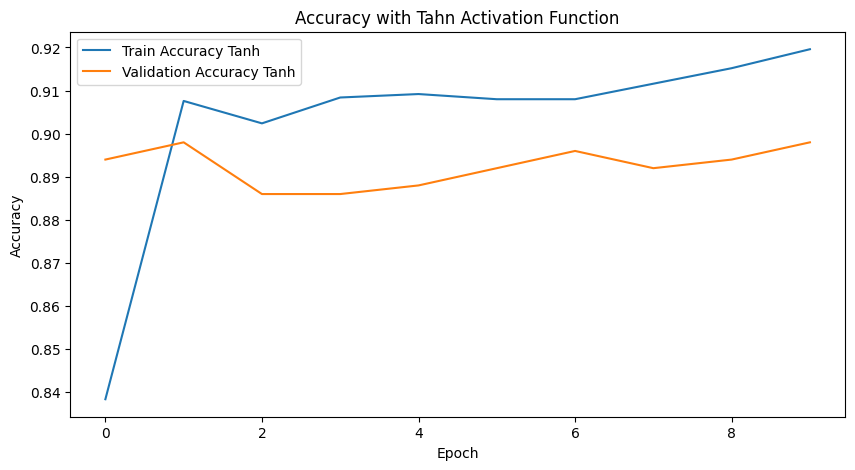

Epoch 1/10


c:\Users\patri\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8198 - loss: 0.8488 - val_accuracy: 0.8940 - val_loss: 0.2871
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9026 - loss: 0.3026 - val_accuracy: 0.8940 - val_loss: 0.2732
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9106 - loss: 0.2420 - val_accuracy: 0.9000 - val_loss: 0.2589
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9153 - loss: 0.2468 - val_accuracy: 0.9060 - val_loss: 0.2545
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9204 - loss: 0.2490 - val_accuracy: 0.9080 - val_loss: 0.2675
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9164 - loss: 0.2376 - val_accuracy: 0.9120 - val_loss: 0.2509
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9169 - loss: 0.2329 - val_accuracy: 0.9080 - val_loss: 0.2524
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9143 - loss: 0.2446 - val_accuracy: 0.9100 - val_loss: 0.2656
Epo

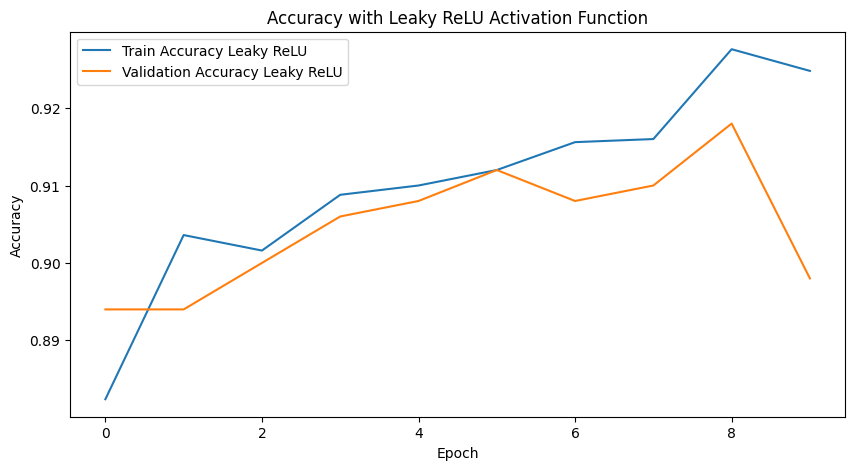

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8017 - loss: 2.2271 - val_accuracy: 0.8940 - val_loss: 2.0340
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9003 - loss: 1.9694 - val_accuracy: 0.8940 - val_loss: 1.7834
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8997 - loss: 1.7206 - val_accuracy: 0.8940 - val_loss: 1.5504
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9008 - loss: 1.4920 - val_accuracy: 0.8940 - val_loss: 1.3425
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9051 - loss: 1.2847 - val_accuracy: 0.8940 - val_loss: 1.1605
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9047 - loss: 1.1078 - val_accuracy: 0.8940 - val_loss: 1.0064
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9047 - loss: 0.9589 - val_accuracy: 0.8940 - val_loss: 0.8811
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9028 - loss: 0.8408 - val_accuracy: 0.8940 - val_loss:

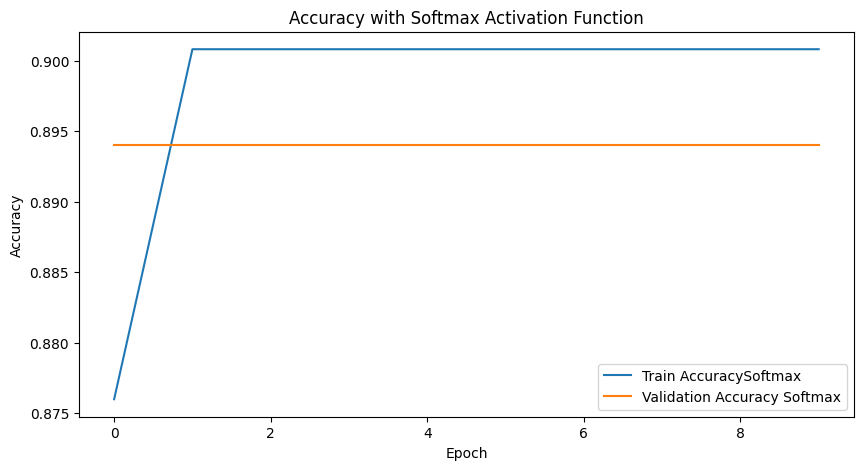

In [35]:
## Q4.2
### Define the LeNet-5 architecture with Tanh activation function
model_tanh = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(6, kernel_size=(5, 5), activation='tanh', input_shape=(32, 32, 3)),
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Conv2D(16, kernel_size=(5, 5), activation='tanh'),
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='tanh'),
    tf.keras.layers.Dense(84, activation='tanh'),
    tf.keras.layers.Dense(10, activation='softmax')
])
### Compile the models
model_tanh.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Train the models
history_tanh= model_tanh.fit(x_train_sample, y_train_sample_one_hot, epochs=10, validation_data=(x_test_sample, y_test_sample_one_hot))

### Plot the train and validation accuracy for Tanh activation function
plt.figure(figsize=(10, 5))
plt.plot(history_tanh.history['accuracy'], label='Train Accuracy Tanh')
plt.plot(history_tanh.history['val_accuracy'], label='Validation Accuracy Tanh')
plt.title('Accuracy with Tahn Activation Function')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Define the LeNet-5 architecture with Leaky ReLU activation function
model_leaky = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(6, kernel_size=(5, 5), activation=tf.keras.layers.LeakyReLU(alpha=0.03), input_shape=(32, 32, 3)),
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Conv2D(16, kernel_size=(5, 5), activation=tf.keras.layers.LeakyReLU(alpha=0.03)),
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation=tf.keras.layers.LeakyReLU(alpha=0.03)),
    tf.keras.layers.Dense(84, activation=tf.keras.layers.LeakyReLU(alpha=0.03)),
    tf.keras.layers.Dense(10, activation='softmax')
])
### Compile the models
model_leaky.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Train the models
history_leaky= model_leaky.fit(x_train_sample, y_train_sample_one_hot, epochs=10, validation_data=(x_test_sample, y_test_sample_one_hot))

### Plot the train and validation accuracy for Leaky ReLU activation function
plt.figure(figsize=(10, 5))
plt.plot(history_leaky.history['accuracy'], label='Train Accuracy Leaky ReLU')
plt.plot(history_leaky.history['val_accuracy'], label='Validation Accuracy Leaky ReLU')
plt.title('Accuracy with Leaky ReLU Activation Function')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Define the LeNet-5 architecture with Softmax activation function
model_softmax = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(6, kernel_size=(5, 5), activation='softmax', input_shape=(32, 32, 3)),
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Conv2D(16, kernel_size=(5, 5), activation='softmax'),
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='softmax'),
    tf.keras.layers.Dense(84, activation='softmax'),
    tf.keras.layers.Dense(10, activation='softmax')
])
### Compile the models
model_softmax.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Train the models
history_softmax= model_softmax.fit(x_train_sample, y_train_sample_one_hot, epochs=10, validation_data=(x_test_sample, y_test_sample_one_hot))

### Plot the train and validation accuracy for Softmax activation function
plt.figure(figsize=(10, 5))
plt.plot(history_softmax.history['accuracy'], label='Train AccuracySoftmax')
plt.plot(history_softmax.history['val_accuracy'], label='Validation Accuracy Softmax')
plt.title('Accuracy with Softmax Activation Function')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The tanh activation function results in a sharper increase in train accuracy initially in comparison to the original model, then very slightly increases its train accuracy over time. However, the validation accuracy is somewhat steady with some variation. Leaky ReLU is very similar to the original model (as the original model uses ReLU), but there is a sharp decline in validation accuracy after the 8th epoch. With the Softmax activation function, it seems to function similarly to the L1 regularization function, where there is a sharp increase for the train accuracy into a constant plateau, and the accuracy of the validation set is constant.

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8474 - loss: 0.7602 - val_accuracy: 0.8940 - val_loss: 0.2871
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9066 - loss: 0.2833 - val_accuracy: 0.8940 - val_loss: 0.2761
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9049 - loss: 0.2810 - val_accuracy: 0.8940 - val_loss: 0.2668
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9030 - loss: 0.2814 - val_accuracy: 0.9060 - val_loss: 0.2553
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9046 - loss: 0.2606 - val_accuracy: 0.8960 - val_loss: 0.2731
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9085 - loss: 0.2865 - val_accuracy: 0.9120 - val_loss: 0.2502
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9160 - loss: 0.2409 - val_accuracy: 0.9180 - val_loss: 0.2497
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9143 - loss: 0.2326 - val_accuracy: 0.9120 - val_loss:

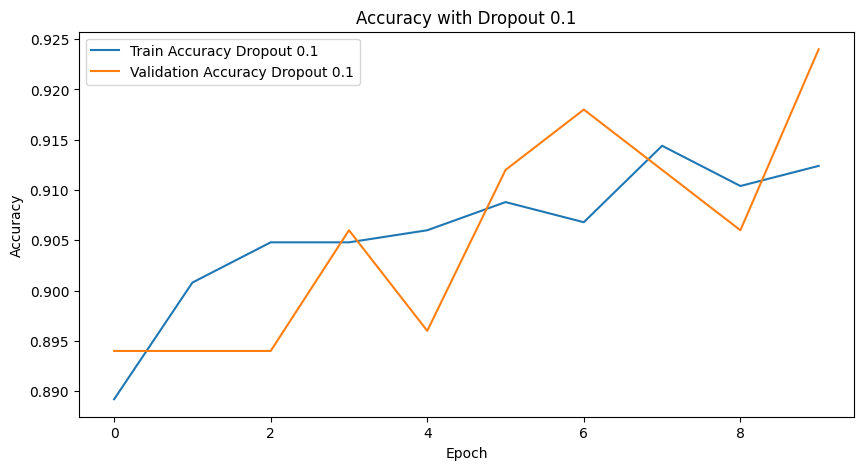

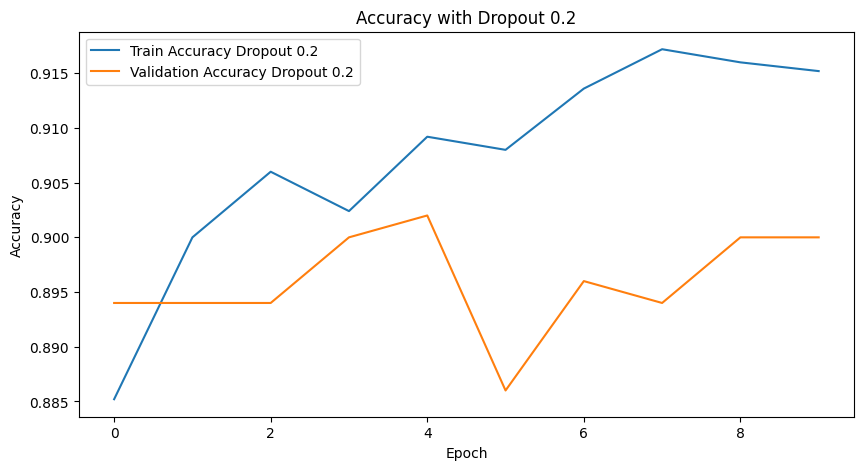

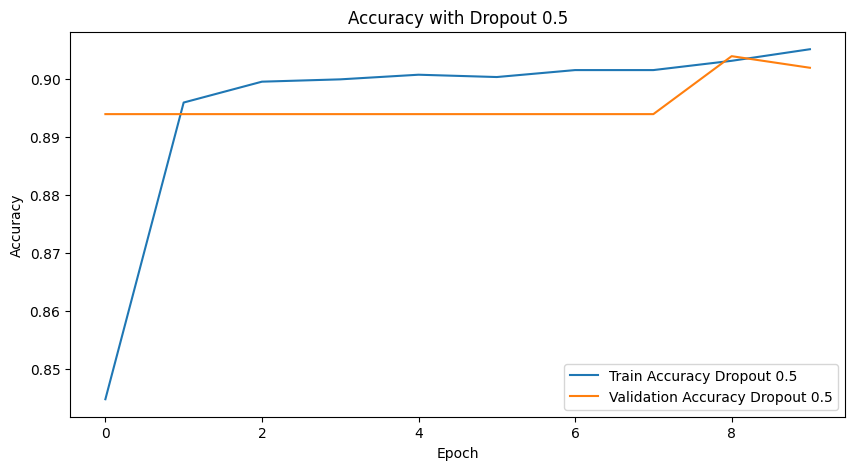

In [37]:
## Q4.3
### Define the LeNet-5 architecture with Dropout 0.1
model_dropout1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Conv2D(16, kernel_size=(5, 5), activation='relu'),
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(10, activation='softmax')
])
### Define the LeNet-5 architecture with Dropout 0.2
model_dropout2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Conv2D(16, kernel_size=(5, 5), activation='relu'),
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])
### Define the LeNet-5 architecture with Dropout 0.5
model_dropout5 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Conv2D(16, kernel_size=(5, 5), activation='relu'),
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])
### Compile the models
model_dropout1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_dropout2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_dropout5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Train the models
history_dropout1= model_dropout1.fit(x_train_sample, y_train_sample_one_hot, epochs=10, validation_data=(x_test_sample, y_test_sample_one_hot))
history_dropout2= model_dropout2.fit(x_train_sample, y_train_sample_one_hot, epochs=10, validation_data=(x_test_sample, y_test_sample_one_hot))
history_dropout5= model_dropout5.fit(x_train_sample, y_train_sample_one_hot, epochs=10, validation_data=(x_test_sample, y_test_sample_one_hot))

### Plot the train and validation accuracy for Dropout 0.1
plt.figure(figsize=(10, 5))
plt.plot(history_dropout1.history['accuracy'], label='Train Accuracy Dropout 0.1')
plt.plot(history_dropout1.history['val_accuracy'], label='Validation Accuracy Dropout 0.1')
plt.title('Accuracy with Dropout 0.1')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Plot the train and validation accuracy for Dropout 0.2
plt.figure(figsize=(10, 5))
plt.plot(history_dropout2.history['accuracy'], label='Train Accuracy Dropout 0.2')
plt.plot(history_dropout2.history['val_accuracy'], label='Validation Accuracy Dropout 0.2')
plt.title('Accuracy with Dropout 0.2')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Plot the train and validation accuracy for Dropout 0.5
plt.figure(figsize=(10, 5))
plt.plot(history_dropout5.history['accuracy'], label='Train Accuracy Dropout 0.5')
plt.plot(history_dropout5.history['val_accuracy'], label='Validation Accuracy Dropout 0.5')
plt.title('Accuracy with Dropout 0.5')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

With dropout of 0.1, the model has a lower train accuracy compared to most of the other models, yet the testing accuracy after multiple epochs seems to be much higher than those of the other models. With dropout of 0.2, the model has higher train accuracy compared to 0.1, but has lower testing accuracy compared to the 0.1 model. With dropout of 0.5, the model seems much more similar to the L1 model and the softmax activation function, but after a few epochs of consistent validation accuracy, the validation accuracy started increasing. 

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8355 - loss: 0.7485 - val_accuracy: 0.8940 - val_loss: 0.2883
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9089 - loss: 0.2666 - val_accuracy: 0.8940 - val_loss: 0.2645
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9051 - loss: 0.2603 - val_accuracy: 0.9000 - val_loss: 0.2564
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9031 - loss: 0.2639 - val_accuracy: 0.8760 - val_loss: 0.3111
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9037 - loss: 0.2432 - val_accuracy: 0.9060 - val_loss: 0.2558
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9221 - loss: 0.2215 - val_accuracy: 0.9020 - val_loss: 0.2552
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9298 - loss: 0.1960 - val_accuracy: 0.9140 - val_loss: 0.2382
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9343 - loss: 0.1706 - val_accuracy: 0.9000 - val_loss:

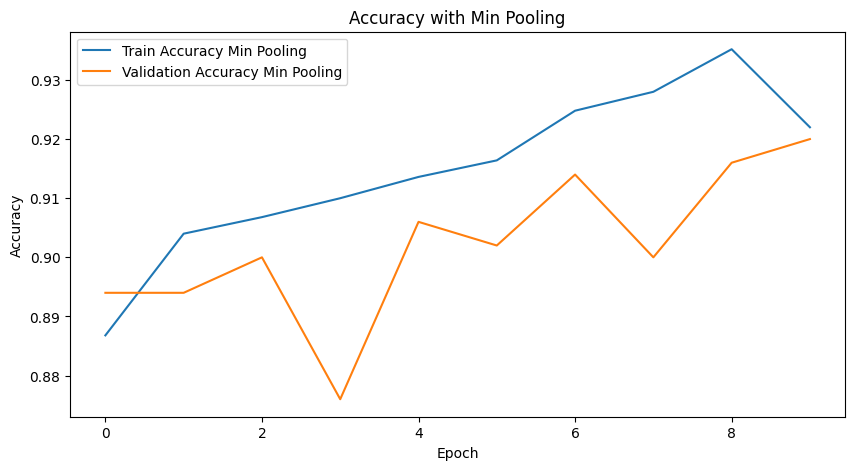

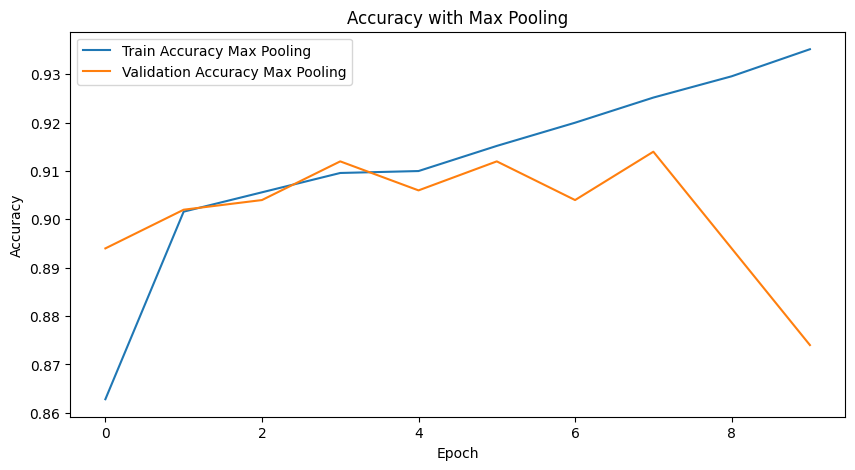

In [43]:
## Q4.4
### Define the LeNet-5 architecture with Max Pooling
model_max_pooling = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Conv2D(16, kernel_size=(5, 5), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

### Min pooling layer found from online https://stackoverflow.com/questions/49217957/minimumpooling-in-keras
from keras import layers
from keras import backend as K

class MinPooling2D(layers.MaxPooling2D):

  def __init__(self, pool_size=(2, 2), strides=2, 
               padding='valid', data_format=None, **kwargs):
    super(MinPooling2D, self).__init__(pool_size, strides, padding,
                                       data_format, **kwargs)

  def pooling_function(self, inputs, pool_size, strides, padding, data_format):
    return -K.pool2d(-inputs, pool_size, strides, padding, data_format,
                                                         pool_mode='max')

### Define the LeNet-5 architecture with Min Pooling
model_min_pooling = tf.keras.models.Sequential()
model_min_pooling.add(layers.Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 3)))
model_min_pooling.add(MinPooling2D(pool_size=(2, 2)))
model_min_pooling.add(layers.Conv2D(16, kernel_size=(5, 5), activation='relu'))
model_min_pooling.add(MinPooling2D(pool_size=(2, 2)))
model_min_pooling.add(layers.Flatten())
model_min_pooling.add(layers.Dense(120, activation='relu'))
model_min_pooling.add(layers.Dense(84, activation='relu'))
model_min_pooling.add(layers.Dense(10, activation='softmax'))

### Compile the models
model_min_pooling.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_max_pooling.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Train the models
history_min_pooling= model_min_pooling.fit(x_train_sample, y_train_sample_one_hot, epochs=10, validation_data=(x_test_sample, y_test_sample_one_hot))
history_max_pooling= model_max_pooling.fit(x_train_sample, y_train_sample_one_hot, epochs=10, validation_data=(x_test_sample, y_test_sample_one_hot))

### Plot the train and validation accuracy for Min Pooling
plt.figure(figsize=(10, 5))
plt.plot(history_min_pooling.history['accuracy'], label='Train Accuracy Min Pooling')
plt.plot(history_min_pooling.history['val_accuracy'], label='Validation Accuracy Min Pooling')
plt.title('Accuracy with Min Pooling')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Plot the train and validation accuracy for Max Pooling
plt.figure(figsize=(10, 5))
plt.plot(history_max_pooling.history['accuracy'], label='Train Accuracy Max Pooling')
plt.plot(history_max_pooling.history['val_accuracy'], label='Validation Accuracy Max Pooling')
plt.title('Accuracy with Max Pooling')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Training accuracy with min and max pooling seem similarly high as to average pooling. Validation accuracy is different with min pooling having a more tumoltuous start then increasing, whereas max pooling has a stable start then dropping. In comparison with the average pooling model, it seems like the max pooling has a higher impact than the min pooling does on the average pooling model.

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8526 - loss: 0.7365 - val_accuracy: 0.8940 - val_loss: 0.3590
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8997 - loss: 0.3225 - val_accuracy: 0.8940 - val_loss: 0.2887
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9052 - loss: 0.2936 - val_accuracy: 0.8940 - val_loss: 0.2873
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8965 - loss: 0.3104 - val_accuracy: 0.8960 - val_loss: 0.2620
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9050 - loss: 0.2920 - val_accuracy: 0.9180 - val_loss: 0.2640
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9119 - loss: 0.2776 - val_accuracy: 0.9220 - val_loss: 0.2371
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9076 - loss: 0.2756 - val_accuracy: 0.9160 - val_loss: 0.2414
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9097 - loss: 0.2604 - val_accuracy: 0.

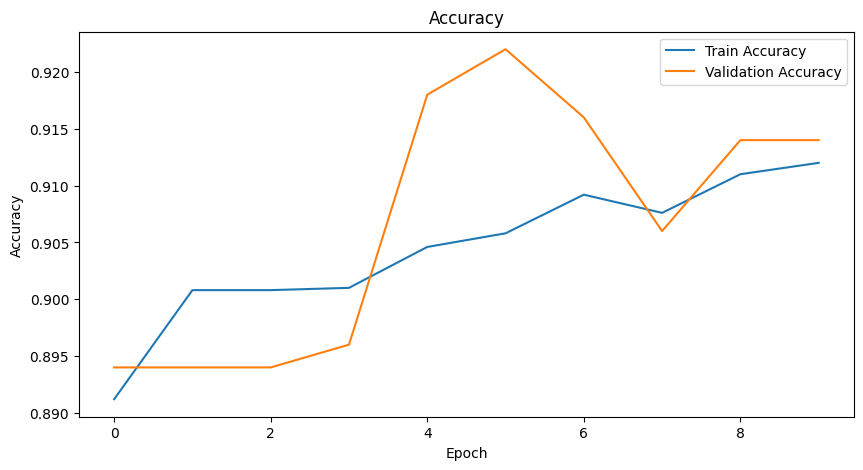

In [92]:
# Task 5:
## Define the augmentation filters
augmentation_filters = [
    transforms.RandomRotation(degrees=30),
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(size=(32, 32), padding=4)
]

## Apply augment filters to the trainings
augmented_images = []
for img in x_train_sample:
    img_pil = transforms.ToPILImage()(img)
    for filter in augmentation_filters:
        img_pil = filter(img_pil)
    augmented_img = transforms.ToTensor()(img_pil).numpy()
    augmented_images.append(np.transpose(augmented_img, (1, 2, 0)))

## Combine the sets of images
x_train_sample_augmented = np.concatenate((x_train_sample, np.array(augmented_images)))
y_train_sample_augmented = np.concatenate((y_train_sample, y_train_sample))

## One-hot encode the labels
y_train_sample_augmented = tf.keras.utils.to_categorical(y_train_sample_augmented, 10)

## Create model with augmented images
model_augmented = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Conv2D(16, kernel_size=(5, 5), activation='relu'),
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

## Compile the model
model_augmented.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Train the model
history_augmented = model_augmented.fit(x_train_sample_augmented, y_train_sample_augmented, epochs=10, validation_data=(x_test_sample, y_test_sample_one_hot))

## Plot the train and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history_augmented.history['accuracy'], label='Train Accuracy')
plt.plot(history_augmented.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
   

c:\Users\patri\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.3919 - loss: 2.1104 - val_accuracy: 0.8940 - val_loss: 0.5276
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9006 - loss: 0.4274 - val_accuracy: 0.8980 - val_loss: 0.3652
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9074 - loss: 0.3057 - val_accuracy: 0.8900 - val_loss: 0.3159
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9182 - loss: 0.2472 - val_accuracy: 0.8640 - val_loss: 0.3724
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9150 - loss: 0.2364 - val_accuracy: 0.8940 - val_loss: 0.3036
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9272 - loss: 0.1987 - val_accuracy: 0.8760 - val_loss: 0.3401
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9326 - loss: 0.1905 - val_accuracy: 0.8840 - val_loss: 0.3281
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9397 - loss: 0.1620 - val_accuracy: 0.

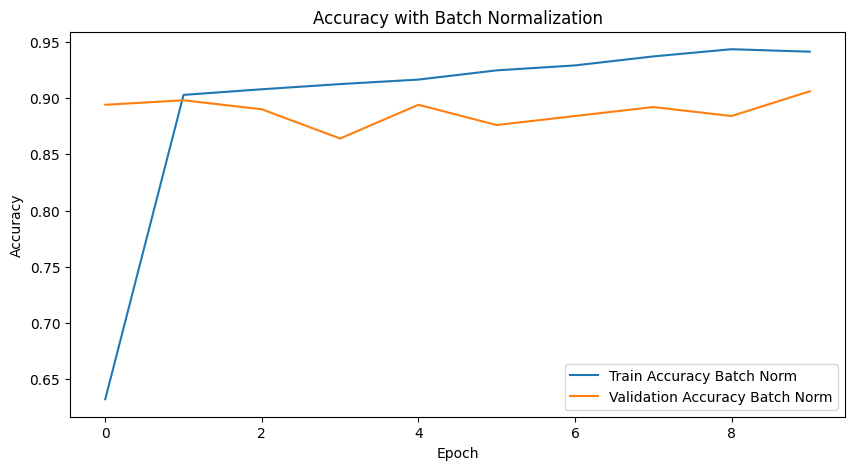

In [ ]:
## Batch Normalization
model_augmented_batch = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Conv2D(16, kernel_size=(5, 5), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation='softmax')
])

## Compile the model
model_augmented_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Train the model
history_augmented_batch = model_augmented_batch.fit(x_train_sample_augmented, y_train_sample_augmented, epochs=10, validation_data=(x_test_sample, y_test_sample_one_hot))

# Plot the train and validation accuracy for Batch Normalization
plt.figure(figsize=(10, 5))
plt.plot(history_augmented_batch.history['accuracy'], label='Train Accuracy Batch Norm')
plt.plot(history_augmented_batch.history['val_accuracy'], label='Validation Accuracy Batch Norm')
plt.title('Accuracy with Batch Normalization')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Batch normalization seems to help with training the model, as it seems to have higher training accuracy over the epochs than those of regular augmentation without batch normalization. Regular model without batch augmentation seems to have a more tumultuous validation accuracy, though it seems that it does end up with higher validation accuracy than that of batch normalization.  Batch normalization has a more stable and consistent training and validation accuracy, but less than the regular model.

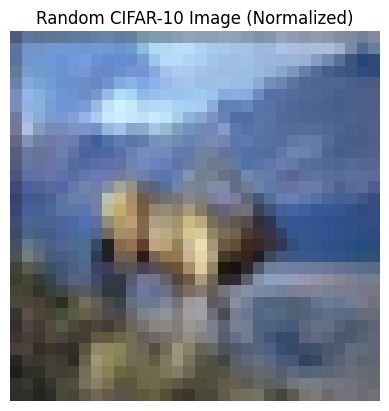

KeyError: 'Exception encountered when calling Functional.call().\n\n\x1b[1m2322537052736\x1b[0m\n\nArguments received by Functional.call():\n  • inputs=tf.Tensor(shape=(1, 32, 32, 3), dtype=uint8)\n  • training=False\n  • mask=None'

In [89]:
# Choose a random image from the CIFAR-10 test set
random_index = np.random.randint(0, len(x_test))
random_image = x_test[random_index]

# Reshape img
x=random_image.reshape(1, 32, 32, 3)

# Normalize the image between -1 and 1
random_image_normalized = (random_image / 127.5) - 1

# Display the normalized image
plt.imshow((random_image_normalized + 1) / 2)  # Convert back to [0, 1] range for display
plt.title("Random CIFAR-10 Image (Normalized)")
plt.axis("off")
plt.show()

# Get list of layers from model
layer_output = [layer.output for layer in model_augmented_batch.layers[1:]]

# Create a visualization model
# Force model_augmented_batch input given a previous input
forced_input = tf.keras.Input(shape=(32, 32, 3))
visualize_model = tf.keras.models.Model(inputs=forced_input, outputs=layer_output)

# Get all layers feature maps for image
feature_maps = visualize_model.predict(x)
print(len(feature_maps))

# Get name of layers from model
layer_names = [layer.name for layer in model_augmented_batch.layers]
print(layer_names)

# Plotting the graph
for layer_names, feature_maps in zip(layer_names, feature_maps):
  print(f"Layer {layer_names} has shape {feature_maps.shape}")
  if len(feature_maps.shape) == 4:
    channels = feature_maps.shape[-1]  # number of features in the feature map
    size = feature_maps.shape[1]  # feature map shape (1, size, size, n_features)
    display_grid = np.zeros((size, size * channels))
    for i in range(channels):
        x = feature_maps[0, :, :, i]
        x -= x.mean()
        x /= x.std()
        x *= 64
        x += 128
        x = np.clip(x, 0, 255).astype('uint8')
        display_grid[:, i * size: (i + 1) * size] = x  # Tile each filter into a horizontal grid
    scale = 20. / channels
    plt.figure(figsize=(scale * channels, scale))
    plt.title(layer_names)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
plt.show()